In [1]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt,seaborn as sns

In [ ]:
# Problem Statement:
# You are the data scientist at a telecom company named “Neo” whose customers are churning out to its competitors. You have to analyze the data of your company and
# find insights and stop your customers from churning out to other telecom companies.

In [2]:
df=pd.read_csv('customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 1. Data Manipulation:

In [7]:
# ● Extract the 5th column and store it in ‘customer_5’
customer_5=df.iloc[:,4:5]
customer_5.head()

,Dependents
0,No
1,No
2,No
3,No
4,No


In [8]:
# ● Extract the 15th column and store it in ‘customer_15’
customer_15=df.iloc[:,14:15]
customer_15.head()

,StreamingMovies
0,No
1,No
2,No
3,No
4,No


In [11]:
# ● Extract all the male senior citizens whose payment method is electronic check and store the result in ‘senior_male_electronic’
senior_male_electronic=df[(df['gender']=='Male')&(df['SeniorCitizen']==1)&(df['PaymentMethod']=='Electronic check')]
senior_male_electronic.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No


In [13]:
# ● Extract all those customers whose tenure is greater than 70 months or their monthly charges is more than $100 and store the result in ‘customer_total_tenure’
customer_total_tenure=df[(df['tenure']>70)|(df['MonthlyCharges']>100)]
customer_total_tenure.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No


In [26]:
# ● Extract all the customers whose contract is of two years, payment method is mailed check and the value of churn is ‘Yes’ and store the result in ‘two_mail_yes’
two_mail_yes=df[(df['Contract']=='Two year')&(df['PaymentMethod']=='Mailed check')&(df['Churn']=='Yes')]
two_mail_yes.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [64]:
# ● Extract 333 random records from the customer_churn dataframe and store the result in ‘customer_333’
import random
customer_333=pd.DataFrame()
r=random.randint(0,len(df))
for i in range(333):
    customer_333=pd.concat([customer_333,df.iloc[r:r+1,:]],ignore_index=True)

print('Shape:',customer_333.shape)
customer_333.head()

Shape: (333, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5555-RNPGT,Male,0,No,Yes,10,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),24.8,223.9,No
1,5555-RNPGT,Male,0,No,Yes,10,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),24.8,223.9,No
2,5555-RNPGT,Male,0,No,Yes,10,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),24.8,223.9,No
3,5555-RNPGT,Male,0,No,Yes,10,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),24.8,223.9,No
4,5555-RNPGT,Male,0,No,Yes,10,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),24.8,223.9,No


In [65]:
# ● Get the count of different levels from the ‘Churn’ column
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

##2. Data Visualization:

In [89]:
df['InternetService'].value_counts().values

array([3096, 2421, 1526])

Text(0.5, 1.0, 'Distribution of Internet Services')

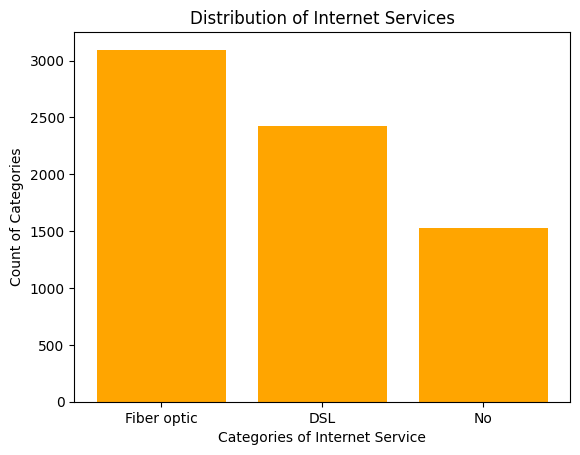

In [90]:
# ● Build a bar-plot for the ’InternetService’ column:
    # a. Set x-axis label to ‘Categories of Internet Service’
    # b. Set y-axis label to ‘Count of Categories’
    # c. Set the title of plot to be ‘Distribution of Internet Service’
    # d. Set the color of the bars to be ‘orange’
plt.bar(df['InternetService'].value_counts().keys(),height=df['InternetService'].value_counts().values,color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Services')

Text(0.5, 1.0, 'Distribution of tenure')

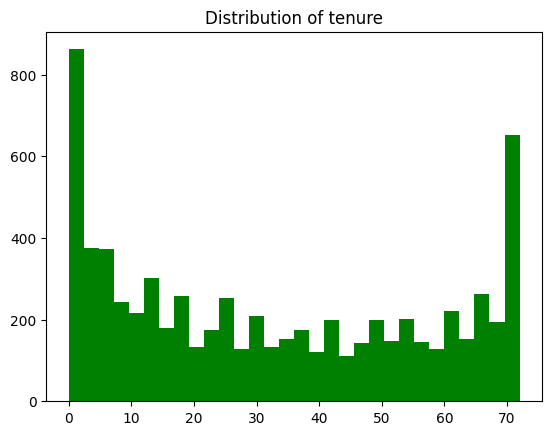

In [92]:
# ● Build a histogram for the ‘tenure’ column:
    # a. Set the number of bins to be 30
    # b. Set the color of the bins to be ‘green’
    # c. Assign the title ‘Distribution of tenure’
plt.hist(df['tenure'],bins=30,color='green')
plt.title('Distribution of tenure')

Text(0.5, 1.0, 'Tenure cs Monthly Charges')

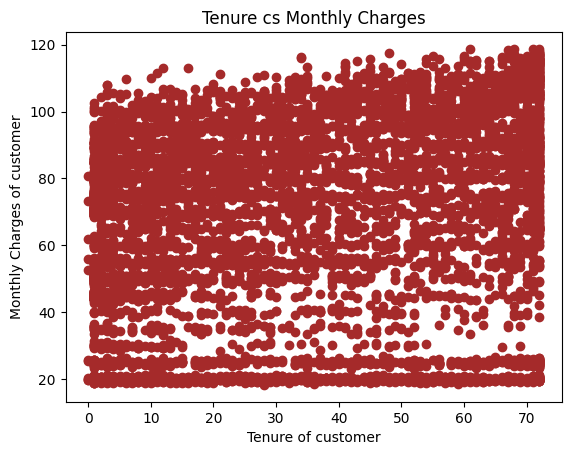

In [97]:
# ● Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure’. Map ‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’:
    # a. Assign the points a color of ‘brown’
    # b. Set the x-axis label to ‘Tenure of customer’
    # c. Set the y-axis label to ‘Monthly Charges of customer’
    # d. Set the title to ‘Tenure vs Monthly Charges’
plt.scatter(x=df['tenure'],y=df['MonthlyCharges'],color='brown')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure cs Monthly Charges')

In [108]:
df['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

<Axes: title={'center': 'tenure'}, xlabel='Contract'>

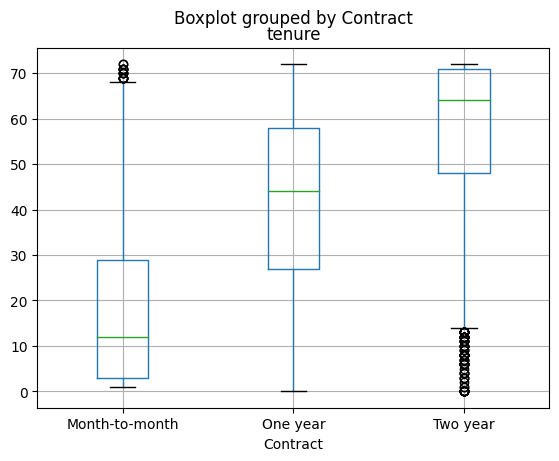

In [111]:
    # e. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis &
    # f. ‘Contract’ on the x-axis.
df.boxplot(column='tenure',by='Contract')

##3. Linear Regression:

In [112]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [113]:
df.duplicated().sum()

0

In [134]:
# ● Build a simple linear model where dependent variable is ‘MonthlyCharges’ and independent variable is ‘tenure’:
    # a. Divide the dataset into train and test sets in 70:30 ratio.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x=df[['tenure']]
y=df['MonthlyCharges']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [135]:
    # b. Build the model on train set and predict the values on test set
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [136]:
y_pred=lr.predict(x_test)
print('Prediction:',y_pred)

Prediction: [75.61177381 67.81091181 57.22402766 ... 56.38822102 71.43274059
 56.38822102]


In [137]:
    # c. After predicting the values, find the root mean square error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred,y_test)
rmse =np.sqrt(mse)

In [123]:
    # d. Find out the error in prediction & store the result in ‘error’
error=pd.DataFrame(columns=['Actual Data','Predicted Data'])
error['Actual Data']=y_test
error['Predicted Data']=y_pred
error['Error']=error['Actual Data']-error['Predicted Data']
error

,Actual Data,Predicted Data,Error
3517,70,41.339186,28.660814
1034,71,35.805615,35.194385
2553,2,23.267524,-21.267524
4457,22,34.434731,-12.434731
1596,2,33.504130,-31.504130
...,...,...,...
4744,64,23.437634,40.562366
3409,70,42.169722,27.830278
242,41,34.374692,6.625308
3062,24,26.279468,-2.279468


In [138]:
    # e. Find the root mean square error
print('Root mean square error is:',rmse)

Root mean square error is: 29.27619025860656


##4. Logistic Regression:

In [159]:
# ● Build a simple logistic regression model where dependent variable is ‘Churn’ and independent variable is ‘MonthlyCharges’:
    # a. Divide the dataset in 65:35 ratio
x=df[['MonthlyCharges']]
y=df['Churn']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.34)

In [160]:
    # b. Build the model on train set and predict the values on test set
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression()
lor.fit(x_train,y_train)

LogisticRegression()

In [161]:
y_pred=lor.predict(x_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [162]:
    # c. Build the confusion matrix and get the accuracy score
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_pred,y_test)
print('Confusion Matrix:\n',cm)
print('Accuracy:',accuracy_score(y_test,y_pred))

Confusion Matrix:
 [[1754  641]
 [   0    0]]
Accuracy: 0.7323590814196242


In [163]:
    # d. Build a multiple logistic regression model where dependent variable is ‘Churn’ and independent variables are ‘tenure’ and ‘MonthlyCharges’
x=df[['tenure','MonthlyCharges']]
y=df['Churn']

In [164]:
    # e. Divide the dataset in 80:20 ratio
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [165]:
    # f. Build the model on train set and predict the values on test set
lor.fit(x_train,y_train)

LogisticRegression()

In [169]:
y_pred=lor.predict(x_test)

In [170]:
    # g. Build the confusion matrix and get the accuracy score
print('Confusion Matrix:\n',confusion_matrix(y_pred,y_test))
print('Accuracy:',accuracy_score(y_test,y_pred))

Confusion Matrix:
 [[932 230]
 [ 84 163]]
Accuracy: 0.7771469127040455


##5. Decision Tree:

In [171]:
# ● Build a decision tree model where dependent variable is ‘Churn’ and independent variable is ‘tenure’:
from sklearn import tree
x=df[['tenure']]
y=df['Churn']

In [179]:
    # a. Divide the dataset in 80:20 ratio
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [180]:
    # b. Build the model on train set and predict the values on test set
clf=tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [181]:
y_pred=clf.predict(x_test)

In [182]:
    # c. Build the confusion matrix and calculate the accuracy
print('Confusion matrix:\n',confusion_matrix(y_pred,y_test))
print('Accuracy:',accuracy_score(y_test,y_pred))

Confusion matrix:
 [[971 240]
 [ 88 110]]
Accuracy: 0.7672107877927609


##6. Random Forest:

In [184]:
# ● Build a Random Forest model where dependent variable is ‘Churn’ and independent variables are ‘tenure’ and ‘MonthlyCharges’:
from sklearn.ensemble import RandomForestClassifier
x=df[['tenure','MonthlyCharges']]
y=df['Churn']

In [195]:
    # a. Divide the dataset in 70:30 ratio
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [196]:
    # b. Build the model on train set and predict the values on test set
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [197]:
y_pred=rf.predict(x_test)
y_pred

array(['Yes', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [198]:
    # c. Build the confusion matrix and calculate the accuracy
print('Confusion matrix:\n',confusion_matrix(y_pred,y_test))
print('Accuracy:',accuracy_score(y_test,y_pred))

Confusion matrix:
 [[1308  295]
 [ 245  265]]
Accuracy: 0.7444391859914813
